## Notebook for visualizing chemical space in reduced dimensions

**Created on 28th Feb, 2023; modified on 9th March, 2023; remodified on 18th February, 2024; re-remodified on 1st Februaru, 2025**

### Fig: 1d

In [1]:
import os, sys
import time
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib.colors as mcolors

# Silence non-critical RDKit warnings to minimize unnecessary outputs
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import umap
# import hdbscan
# import molplotly

from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, PandasTools, Fragments, rdMolDescriptors, Descriptors, rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.PandasTools import ChangeMoleculeRendering
import plotly.express as px
from IPython.display import SVG, display
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool, ColorBar, CategoricalColorMapper
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, output_file, save
from bokeh.transform import linear_cmap
from bokeh.palettes import Turbo256, d3
import pdb
# output_notebook()

In [2]:
# cmap = mcolors.LinearSegmentedColormap.from_list('', [(vmin, 'white'), (vmax, color)])
# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
def create_cmap(listval, color):
    vmin = min(listval)
    vmax = max(listval)
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = mcolors.LinearSegmentedColormap.from_list('', [(norm(vmin), 'white'), (norm(vmax), color)])
    return cmap, norm

In [3]:
df = pd.read_csv('./unique_solvent_databases_fgrp_class.csv')
df

,smiles,mean_property_value,database,class
0,C(C#CC(C)C)(C)C,5.481535,MP_oxstab,Other
1,C(=O)=O,9.433272,MP_oxstab,Other
2,O,7.902121,MP_oxstab,Other
3,C(=C\C)/C(C)C,5.085723,MP_oxstab,Other
4,c1(c(ccc(c1)C)C)C,4.733493,MP_oxstab,Aromatic
...,...,...,...,...
18383,O=C1OCC(F)O1,0.977029,EDB_2,Carbonate
18384,O=C1OCCO1,0.909369,EDB_2,Carbonate
18385,O=C=O,0.999000,EDB_2,Other
18386,O=S1(=O)CCCC1,0.985000,EDB_2,Sulfone


In [5]:
df_ = df.copy()
trial = 4
X_tsne_ = np.load('./X_tsne_trial_{}_openTSNE.npy'.format(trial), allow_pickle=True)
df_['tsne_0'] = X_tsne_[:,0]
df_['tsne_1'] = X_tsne_[:,1]
df_

,smiles,mean_property_value,database,class,tsne_0,tsne_1
0,C(C#CC(C)C)(C)C,5.481535,MP_oxstab,Other,5.317726,19.608474
1,C(=O)=O,9.433272,MP_oxstab,Other,2.272262,17.790176
2,O,7.902121,MP_oxstab,Other,2.631746,18.703068
3,C(=C\C)/C(C)C,5.085723,MP_oxstab,Other,5.377594,18.744755
4,c1(c(ccc(c1)C)C)C,4.733493,MP_oxstab,Aromatic,10.869368,0.089336
...,...,...,...,...,...,...
18383,O=C1OCC(F)O1,0.977029,EDB_2,Carbonate,8.495762,31.727039
18384,O=C1OCCO1,0.909369,EDB_2,Carbonate,5.988254,29.368194
18385,O=C=O,0.999000,EDB_2,Other,2.276040,17.803165
18386,O=S1(=O)CCCC1,0.985000,EDB_2,Sulfone,2.216475,31.213334


In [11]:
df_['log_mean_property_value'] = np.log(df_['mean_property_value'])
df_

,smiles,mean_property_value,database,class,tsne_0,tsne_1,log_mean_property_value
0,C(C#CC(C)C)(C)C,5.481535,MP_oxstab,Other,5.317726,19.608474,1.701385
1,C(=O)=O,9.433272,MP_oxstab,Other,2.272262,17.790176,2.244243
2,O,7.902121,MP_oxstab,Other,2.631746,18.703068,2.067131
3,C(=C\C)/C(C)C,5.085723,MP_oxstab,Other,5.377594,18.744755,1.626437
4,c1(c(ccc(c1)C)C)C,4.733493,MP_oxstab,Aromatic,10.869368,0.089336,1.554663
...,...,...,...,...,...,...,...
18383,O=C1OCC(F)O1,0.977029,EDB_2,Carbonate,8.495762,31.727039,-0.023239
18384,O=C1OCCO1,0.909369,EDB_2,Carbonate,5.988254,29.368194,-0.095005
18385,O=C=O,0.999000,EDB_2,Other,2.276040,17.803165,-0.001001
18386,O=S1(=O)CCCC1,0.985000,EDB_2,Sulfone,2.216475,31.213334,-0.015114


In [14]:
mp_os_ = df_.loc[df_['database'] == 'MP_oxstab']
edb_cond_ = df_.loc[df_['database'] == 'EDB_1']
edb_ce_ = df_.loc[df_['database'] == 'EDB_2']

In [7]:
print(df_['tsne_0'].min(), df_['tsne_0'].max())
print(df_['tsne_1'].min(), df_['tsne_1'].max())

-71.29369306412178 61.825776645648055
-91.79770863528975 99.64534615855223


#### old plot: not using

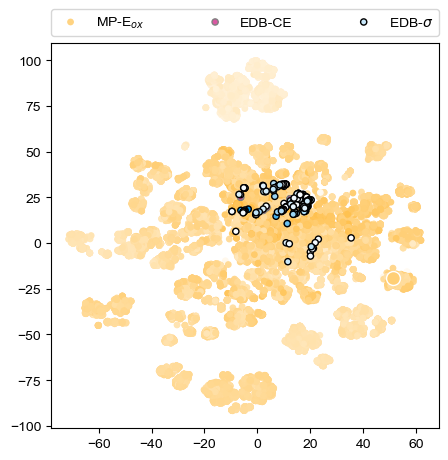

In [8]:
# fig, ax = plt.subplots(figsize=(5,5))
# cmap1, norm1 = create_cmap(mp_os_["mean_property_value"], 'orange')  ## orange colormap --> Oxstab
# cmap2, norm2 = create_cmap(edb_cond_["mean_property_value"], (0, 0.576, 0.902))  ## blue colormap --> Conductivity
# cmap3, norm3 = create_cmap(edb_ce_["mean_property_value"], (0.839, 0.286, 0.604))  ## purple colormap --> CE

# # Define the coordinates of the points you want to highlight
# highlight_coords = [tuple(row) for row in df_.loc[df_['smiles'].isin(['c1cc2c(cc1)C(=O)c1c(C2=O)cccc1'])][['tsne_0', 'tsne_1']].values]

# mask1 = ~mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
# scatter1 = ax.scatter(mp_os_[mask1]["tsne_0"], mp_os_[mask1]["tsne_1"], c=mp_os_[mask1]["mean_property_value"], s=15, cmap=cmap1, norm=norm1, label='MP-E$_{ox}$', edgecolors=None)
# mask2 = mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
# scatter1_ = ax.scatter(mp_os_[mask2]["tsne_0"], mp_os_[mask2]["tsne_1"], c=mp_os_[mask2]["mean_property_value"], s=100, cmap=cmap1, norm=norm1, edgecolors='white')

# scatter3 = ax.scatter(edb_ce_["tsne_0"], edb_ce_["tsne_1"], c=edb_ce_["mean_property_value"], s=20, cmap=cmap3, norm=norm3, label='EDB-CE', edgecolors='grey')
# scatter2 = ax.scatter(edb_cond_["tsne_0"], edb_cond_["tsne_1"], c=edb_cond_["mean_property_value"], s=20, cmap=cmap2, norm=norm2, label='EDB-$\sigma$', edgecolors='black')
# # ax.vlines(x=[-13,40], ymin=-90, ymax=90, linestyles='dashed', colors='black')
# # ax.hlines(y=[-13,35], xmin=-70, xmax=60, linestyles='dashed', colors='black')

# plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#                 mode="expand", borderaxespad=0, ncol=3)
# # plt.savefig('tsne_fig1f.eps'.format(trial), dpi=300)
# # plt.savefig('tsne_fig1f.tiff'.format(trial), dpi=300)

(-13.0, 35.0)

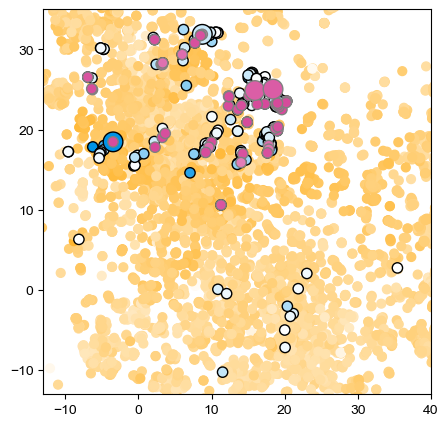

In [9]:
# fig, ax = plt.subplots(figsize=(5,5))
# cmap1, norm1 = create_cmap(mp_os_["mean_property_value"], 'orange')  ## orange colormap --> Oxstab
# cmap2, norm2 = create_cmap(edb_cond_["mean_property_value"], (0, 0.576, 0.902))  ## blue colormap --> Conductivity
# cmap3, norm3 = create_cmap(edb_ce_["mean_property_value"], (0.839, 0.286, 0.604))  ## purple colormap --> CE

# # Define the coordinates of the points you want to highlight
# highlight_coords_1_ = [tuple(row) for row in df_.loc[df_['smiles'].isin(['CC#N', 'CC1COC(=O)O1'])][['tsne_0', 'tsne_1']].values]
# highlight_coords_2_ = [tuple(row) for row in df_.loc[df_['smiles'].isin(['COCCOC', 'COCCOCCOCC(F)(F)OC(F)(F)C(F)(F)OC(F)(F)COCCOCCOC'])][['tsne_0', 'tsne_1']].values]

# scatter1 = ax.scatter(mp_os_["tsne_0"], mp_os_["tsne_1"], c=mp_os_["mean_property_value"], s=40, cmap=cmap1, label='MP-E$_{ox}$')

# # Create a mask that is True for all points except the ones at highlight_coords
# mask1_1 = ~edb_cond_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_1_)
# scatter1_1 = ax.scatter(edb_cond_[mask1_1]["tsne_0"], edb_cond_[mask1_1]["tsne_1"], c=edb_cond_[mask1_1]["mean_property_value"], s=55, cmap=cmap2, label='EDB-$\sigma$', edgecolors='black')

# # Create a mask that is True only for the points at highlight_coords and plot these points with a different edge color
# mask1_2 = edb_cond_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_1_)
# scatter1_2 = ax.scatter(edb_cond_[mask1_2]["tsne_0"], edb_cond_[mask1_2]["tsne_1"], c=edb_cond_[mask1_2]["mean_property_value"], s=200, cmap=cmap2, label='EDB-$\sigma$', edgecolors='black', vmin=edb_cond_["mean_property_value"].min(), vmax=edb_cond_["mean_property_value"].max())

# mask2_1 = ~edb_ce_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_2_)
# scatter2_1 = ax.scatter(edb_ce_[mask2_1]["tsne_0"], edb_ce_[mask2_1]["tsne_1"], c=edb_ce_[mask2_1]["mean_property_value"], s=55, cmap=cmap3, label='EDB-CE', edgecolors='grey')

# mask2_2 = edb_ce_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_2_)
# scatter2_2 = ax.scatter(edb_ce_[mask2_2]["tsne_0"], edb_ce_[mask2_2]["tsne_1"], c=edb_ce_[mask2_2]["mean_property_value"], s=200, cmap=cmap3, label='EDB-CE', edgecolors='grey', vmin=edb_ce_["mean_property_value"].min(), vmax=edb_ce_["mean_property_value"].max())
# # scatter3 = ax.scatter(edb_ce["tsne_0"], edb_ce["tsne_1"], c=edb_ce["mean_property_value"], s=55, cmap=cmap3, label='EDB-CE', edgecolors='grey')
# plt.xlim([-13,40])
# plt.ylim([-13,35])

# # plt.yticks(ticks=[-20,-10,0,10,20,30,40,50], labels=[-20,-10,0,10,20,30,40,50])
# # ax.xaxis.set_ticks(ticks=[-20,-10,0,10,20,30,40,50])
# # ax.xaxis.set_ticks(ticks=[-10,10,30,50])
# # ax.yaxis.set_ticks(ticks=[-10,10,30,50])
# # ax.set_aspect('equal')
# # ax.set_yticks([-20,-10,0,10,20,30,40,50])
# # plt.savefig('tsne_fig1f_zoom.eps', dpi=300, bbox_inches='tight')

#### New t-SNE plots

In [47]:
def create_cmap(listval, color):
    vmin = min(listval)
    vmax = max(listval)
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    # norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)
    cmap = mcolors.LinearSegmentedColormap.from_list('', [(norm(vmin), 'white'), (norm(vmax), color)])
    # cmap = mcolors.LogNorm(vmin=vmin, vmax=vmax)
    return cmap, norm

In [26]:
mp_os_ = df_.loc[df_['database'] == 'MP_oxstab']
edb_cond_ = df_.loc[df_['database'] == 'EDB_1']
edb_ce_ = df_.loc[df_['database'] == 'EDB_2']

In [32]:
mp_os_ = mp_os_.loc[mp_os_['mean_property_value'] > 3.0] ## to distinguish colors

<AxesSubplot: xlabel='mean_property_value', ylabel='Count'>

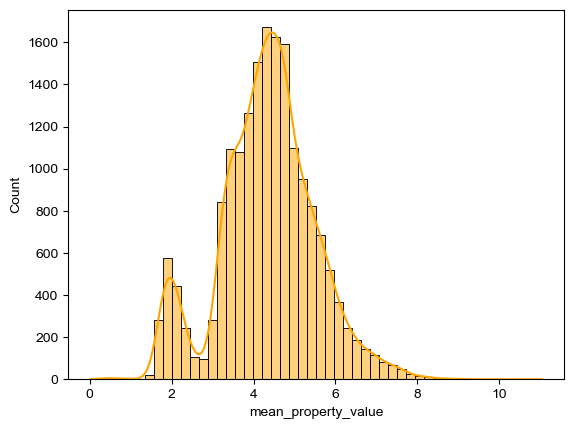

In [30]:
sns.histplot(mp_os_["mean_property_value"], bins=50, color='orange', kde=True)

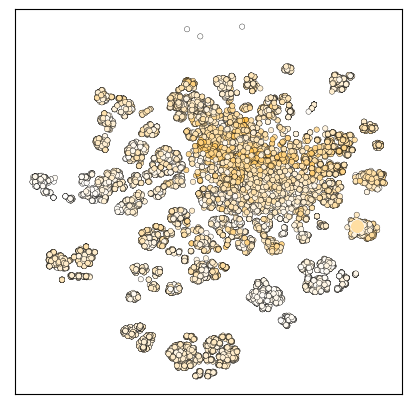

In [77]:
fig, ax = plt.subplots(figsize=(5,5))
cmap1, norm1 = create_cmap(mp_os_["mean_property_value"], 'orange')  ## orange colormap --> Oxstab
cmap2, norm2 = create_cmap(edb_cond_["mean_property_value"], (0, 0.576, 0.902))  ## blue colormap --> Conductivity
cmap3, norm3 = create_cmap(edb_ce_["mean_property_value"], (0.839, 0.286, 0.604))  ## purple colormap --> CE

# Define the coordinates of the points you want to highlight
highlight_coords = [tuple(row) for row in df_.loc[df_['smiles'].isin(['c1cc2c(cc1)C(=O)c1c(C2=O)cccc1'])][['tsne_0', 'tsne_1']].values]

mask1 = ~mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
scatter1 = ax.scatter(mp_os_[mask1]["tsne_0"], mp_os_[mask1]["tsne_1"], c=mp_os_[mask1]["mean_property_value"], s=15, cmap=cmap1, norm=norm1, label='MP-E$_{ox}$', edgecolors='black', linewidths=0.25)
mask2 = mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
scatter1_ = ax.scatter(mp_os_[mask2]["tsne_0"], mp_os_[mask2]["tsne_1"], c=mp_os_[mask2]["mean_property_value"], s=100, cmap=cmap1, norm=norm1, edgecolors='white', linewidths=0.5)

plt.xticks([])
plt.yticks([])

# plt.savefig('tsne_fig1f.eps'.format(trial), dpi=300)
plt.savefig('plot_tsne_fig1d.tiff', dpi=300, transparent=True)

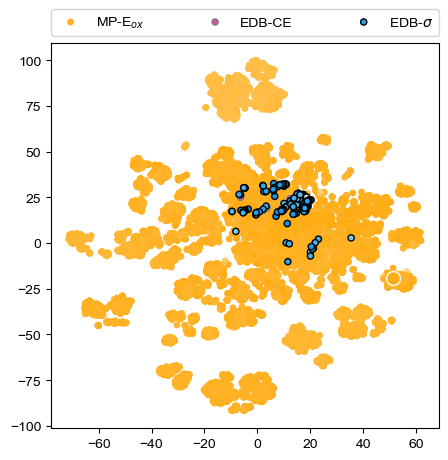

In [15]:
# fig, ax = plt.subplots(figsize=(5,5))
# cmap1, norm1 = create_cmap(mp_os_["log_mean_property_value"], 'orange')  ## orange colormap --> Oxstab
# cmap2, norm2 = create_cmap(edb_cond_["log_mean_property_value"], (0, 0.576, 0.902))  ## blue colormap --> Conductivity
# cmap3, norm3 = create_cmap(edb_ce_["log_mean_property_value"], (0.839, 0.286, 0.604))  ## purple colormap --> CE

# # Define the coordinates of the points you want to highlight
# highlight_coords = [tuple(row) for row in df_.loc[df_['smiles'].isin(['c1cc2c(cc1)C(=O)c1c(C2=O)cccc1'])][['tsne_0', 'tsne_1']].values]

# mask1 = ~mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
# scatter1 = ax.scatter(mp_os_[mask1]["tsne_0"], mp_os_[mask1]["tsne_1"], c=mp_os_[mask1]["log_mean_property_value"], s=15, cmap=cmap1, norm=norm1, label='MP-E$_{ox}$', edgecolors=None)
# mask2 = mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
# scatter1_ = ax.scatter(mp_os_[mask2]["tsne_0"], mp_os_[mask2]["tsne_1"], c=mp_os_[mask2]["log_mean_property_value"], s=100, cmap=cmap1, norm=norm1, edgecolors='white')

# scatter3 = ax.scatter(edb_ce_["tsne_0"], edb_ce_["tsne_1"], c=edb_ce_["log_mean_property_value"], s=20, cmap=cmap3, norm=norm3, label='EDB-CE', edgecolors='grey')
# scatter2 = ax.scatter(edb_cond_["tsne_0"], edb_cond_["tsne_1"], c=edb_cond_["log_mean_property_value"], s=20, cmap=cmap2, norm=norm2, label='EDB-$\sigma$', edgecolors='black')
# # ax.vlines(x=[-13,40], ymin=-90, ymax=90, linestyles='dashed', colors='black')
# # ax.hlines(y=[-13,35], xmin=-70, xmax=60, linestyles='dashed', colors='black')

# plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#                 mode="expand", borderaxespad=0, ncol=3)
# # plt.savefig('tsne_fig1f.eps'.format(trial), dpi=300)
# # plt.savefig('tsne_fig1f.tiff'.format(trial), dpi=300)

In [72]:
edb_ce_['log_mean_property_value'] = -np.log10(1 - edb_ce_['mean_property_value'])

/var/folders/s5/lmr5dh0n4bsgnpxrzwlts5lw0000gn/T/ipykernel_52485/57946540.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



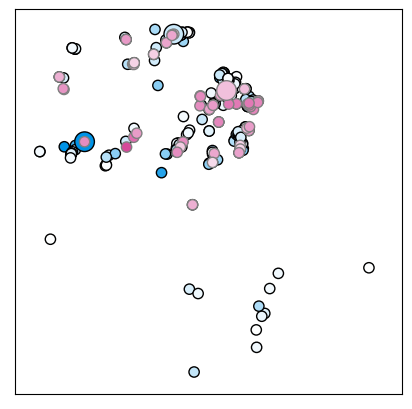

In [76]:
fig, ax = plt.subplots(figsize=(5,5))
cmap1, norm1 = create_cmap(mp_os_["mean_property_value"], 'orange')  ## orange colormap --> Oxstab
cmap2, norm2 = create_cmap(edb_cond_["mean_property_value"], (0, 0.576, 0.902))  ## blue colormap --> Conductivity
cmap3, norm3 = create_cmap(edb_ce_["log_mean_property_value"], (0.839, 0.286, 0.604))  ## purple colormap --> CE
# Define the coordinates of the points you want to highlight
highlight_coords_1_ = [tuple(row) for row in df_.loc[df_['smiles'].isin(['CC#N', 'CC1COC(=O)O1'])][['tsne_0', 'tsne_1']].values]
highlight_coords_2_ = [tuple(row) for row in df_.loc[df_['smiles'].isin(['COCCOC', 'COCCOCCOCC(F)(F)OC(F)(F)C(F)(F)OC(F)(F)COCCOCCOC'])][['tsne_0', 'tsne_1']].values]

# scatter1 = ax.scatter(mp_os_["tsne_0"], mp_os_["tsne_1"], c=mp_os_["mean_property_value"], s=40, cmap=cmap1, label='MP-E$_{ox}$') ## uncomment to also visualize MP-oxstab database

# Create a mask that is True for all points except the ones at highlight_coords
mask1_1 = ~edb_cond_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_1_)
scatter1_1 = ax.scatter(edb_cond_[mask1_1]["tsne_0"], edb_cond_[mask1_1]["tsne_1"], c=edb_cond_[mask1_1]["mean_property_value"], s=55, cmap=cmap2, label='EDB-$\sigma$', edgecolors='black')

# Create a mask that is True only for the points at highlight_coords and plot these points with a different edge color
mask1_2 = edb_cond_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_1_)
scatter1_2 = ax.scatter(edb_cond_[mask1_2]["tsne_0"], edb_cond_[mask1_2]["tsne_1"], c=edb_cond_[mask1_2]["mean_property_value"], s=200, cmap=cmap2, label='EDB-$\sigma$', edgecolors='black', vmin=edb_cond_["mean_property_value"].min(), vmax=edb_cond_["mean_property_value"].max())

mask2_1 = ~edb_ce_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_2_)
scatter2_1 = ax.scatter(edb_ce_[mask2_1]["tsne_0"], edb_ce_[mask2_1]["tsne_1"], c=edb_ce_[mask2_1]["log_mean_property_value"], s=55, cmap=cmap3, label='EDB-CE', edgecolors='grey')

mask2_2 = edb_ce_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_2_)
scatter2_2 = ax.scatter(edb_ce_[mask2_2]["tsne_0"], edb_ce_[mask2_2]["tsne_1"], c=edb_ce_[mask2_2]["log_mean_property_value"], s=200, cmap=cmap3, label='EDB-CE', edgecolors='grey', vmin=edb_ce_["log_mean_property_value"].min(), vmax=edb_ce_["log_mean_property_value"].max())
# scatter3 = ax.scatter(edb_ce["tsne_0"], edb_ce["tsne_1"], c=edb_ce["mean_property_value"], s=55, cmap=cmap3, label='EDB-CE', edgecolors='grey')
plt.xlim([-13,40])
plt.ylim([-13,35])

plt.xticks([])
plt.yticks([])

# plt.colorbar(scatter1, ax=ax, orientation='horizontal', label='Mean property value') ## uncomment to visualize colorbar for MP-oxstab database
# plt.colorbar(scatter1_1, ax=ax, orientation='horizontal', label='Mean property value', ticks=np.linspace(edb_cond_['mean_property_value'].min(), edb_cond_['mean_property_value'].max(), 5)) ## uncomment to visualize colorbar for EDB-1 database
# plt.colorbar(scatter2_2, ax=ax, orientation='horizontal', label='Log mean property value', ticks=np.linspace(edb_ce_['log_mean_property_value'].min(), edb_ce_['log_mean_property_value'].max(), 5))

plt.savefig('plot_tsne_fig1d_zoom.eps', dpi=300, bbox_inches='tight')

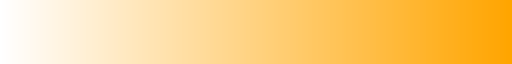

In [54]:
cmap1

In [70]:
edb_ce_['log_mean_property_value'].min()
edb_ce_['log_mean_property_value'].max()

6.907755278982136

In [73]:
edb_ce_

,smiles,mean_property_value,database,class,tsne_0,tsne_1,log_mean_property_value
18335,C1CCOC1,0.959800,EDB_2,Ether,3.113682,28.143690,1.395774
18336,C1COCCO1,0.949000,EDB_2,Ether,3.279831,28.104984,1.292430
18337,C1COCO1,0.897273,EDB_2,Ether,3.321894,28.313329,0.988314
18338,CC#N,0.990000,EDB_2,Nitriles,-3.466997,18.469946,2.000000
18339,CC1CCCO1,0.968200,EDB_2,Ether,-6.918180,26.547830,1.497573
18340,CC1COC(=O)O1,0.862000,EDB_2,Carbonate,8.736997,31.876236,0.860121
18341,CCCCOCCCC,0.990000,EDB_2,Ether,12.316602,22.949668,2.000000
18342,CCN(CC)S(=O)(=O)C(F)(F)F,0.990000,EDB_2,Other,9.997917,18.433594,2.000000
18343,CCOC(=O)OC,0.902333,EDB_2,Carbonate,17.814697,18.013185,1.010254
18344,CCOC(=O)OCC,0.892393,EDB_2,Carbonate,17.832407,17.555288,0.968161


In [55]:
df_.loc[df_['smiles'].isin(['COCCOC', 'COCCOCCOCC(F)(F)OC(F)(F)C(F)(F)OC(F)(F)COCCOCCOC'])]

,smiles,mean_property_value,database,class,tsne_0,tsne_1,log_mean_property_value
18228,COCCOC,5.317639,EDB_1,Ether,15.926352,24.871646,1.671029
18239,COCCOCCOCC(F)(F)OC(F)(F)C(F)(F)OC(F)(F)COCCOCCOC,0.502023,EDB_1,Ether,18.413582,25.045241,-0.689110
18365,COCCOC,0.944793,EDB_2,Ether,15.931827,24.871614,-0.056789
18367,COCCOCCOCC(F)(F)OC(F)(F)C(F)(F)OC(F)(F)COCCOCCOC,0.950000,EDB_2,Ether,18.414114,25.045862,-0.051293


In [89]:
df_.loc[df_['smiles'] == 'CC#N'][['tsne_0', 'tsne_1']].values[0] ## ACN

array([-3.46570545, 18.47044246])

In [90]:
df_.loc[df_['smiles'] == 'CC1COC(=O)O1'][['tsne_0', 'tsne_1']].values[0] ## PC

array([ 8.73755954, 31.87547804])

In [92]:
df_.loc[df_['smiles'] == 'COCCOC'][['tsne_0', 'tsne_1']].values[0] ## DME

array([15.92635172, 24.87164574])

In [93]:
df_.loc[df_['smiles'] == 'COCCOCCOCC(F)(F)OC(F)(F)C(F)(F)OC(F)(F)COCCOCCOC'][['tsne_0', 'tsne_1']].values[0] ## DEG-FTriEG

array([18.41358177, 25.04524147])

In [94]:
df_.loc[df_['smiles'] == 'c1cc2c(cc1)C(=O)c1c(C2=O)cccc1'][['tsne_0', 'tsne_1']].values[0] ## anthraquinone

array([ 51.39895876, -19.16349337])